# Analysis of AirBNB data in Seattle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
%matplotlib notebook   

## Business Questions

- When is the cheapest season to rent on airbnb?
- When is the best moment to list his or her flat on airbnb?
- How can we increase his or her ratings on airbnb?

## Data Preparation

### Import the data

In [3]:
# path to csv files
path = 'seattle/'

In [4]:
# load df
listings_df = pd.read_csv(path+'listings.csv')
calendar_df = pd.read_csv(path+'calendar.csv')
reviews_df = pd.read_csv(path+'reviews.csv')

In [5]:
# explore data
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [6]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Look at missing values

- Calendar df

In [8]:
# calendar_df
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [9]:
# filter for available dates
calendar_avail_df = calendar_df[calendar_df.available == 't']

In [10]:
calendar_avail_df.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [11]:
# change types
calendar_avail_df.loc[:,'date'] = pd.to_datetime(calendar_avail_df['date'])
calendar_avail_df['price'] = calendar_avail_df.price.replace('[\$,]', '', regex=True).astype(float)

/Users/quentinchalvondemersay/anaconda/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/quentinchalvondemersay/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


- listings

In [12]:
# select relevant columns
col = ['review_scores_rating', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'accommodates', \
      'bathrooms', 'beds', 'price', 'extra_people' , 'maximum_nights', 'availability_365', \
      'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
list_df = listings_df.loc[:,col]

In [13]:
list_df.head(3)

,review_scores_rating,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bathrooms,beds,price,extra_people,maximum_nights,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,95.0,96%,100%,f,3.0,4,1.0,1.0,$85.00,$5.00,365,346,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,96.0,98%,100%,t,6.0,4,1.0,1.0,$150.00,$0.00,90,291,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,97.0,67%,100%,f,2.0,11,4.5,7.0,$975.00,$25.00,30,220,10.0,10.0,10.0,10.0,10.0,10.0,1.15


In [15]:
# convert columns to the right type
list_df['host_response_rate'] = list_df['host_response_rate'].replace('[%]', '', regex=True).astype(float)
list_df['host_acceptance_rate'] = list_df['host_acceptance_rate'].replace('[%]', '', regex=True).astype(float)

# fill missing values, if the acceptance rate is missing we can consider that it corresponds to non acceptance i.e. 0
list_df['host_response_rate'].fillna(0, inplace = True)
list_df['host_acceptance_rate'].fillna(0, inplace = True)

In [16]:
# change categorical variables to 1 and 0 instead of true and false for superhost
list_df['host_is_superhost'] = [1 if ele == 't' else 0 for ele in list_df['host_is_superhost']]

In [17]:
# convert price to float
list_df['price'] = list_df['price'].replace('[\$,]', '', regex=True).astype(float)
list_df['extra_people'] = list_df.extra_people.replace('[\$,]', '', regex = True).astype(float)

In [54]:
# remove rows with missing values because it corresponds mostly to the rating that we cannot predict if it is missing. 
# Those listings correspond likely to new lisi
list_df.dropna(how='any', inplace=True)

In [55]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3146 entries, 0 to 3814
Data columns (total 19 columns):
review_scores_rating           3146 non-null float64
host_response_rate             3146 non-null float64
host_acceptance_rate           3146 non-null float64
host_is_superhost              3146 non-null int64
host_total_listings_count      3146 non-null float64
accommodates                   3146 non-null int64
bathrooms                      3146 non-null float64
beds                           3146 non-null float64
price                          3146 non-null float64
extra_people                   3146 non-null float64
maximum_nights                 3146 non-null int64
availability_365               3146 non-null int64
review_scores_accuracy         3146 non-null float64
review_scores_cleanliness      3146 non-null float64
review_scores_checkin          3146 non-null float64
review_scores_communication    3146 non-null float64
review_scores_location         3146 non-null float64


## Analysis

### Seasonality of price

In [35]:
df_price = calendar_avail_df.groupby('date')['price'].mean()

<IPython.core.display.Javascript object>


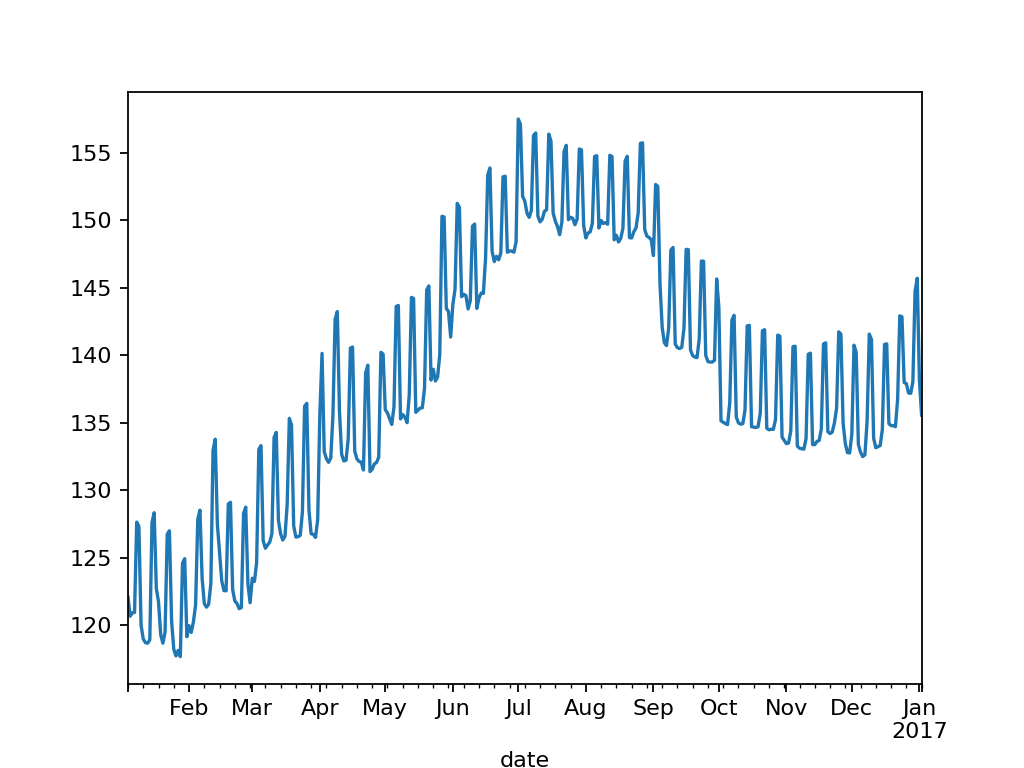

In [40]:
# visualization
prices = df_price.plot.line()

### Seasonality of number of listing

In [44]:
df_listing = calendar_avail_df.groupby('date').listing_id.nunique()

In [46]:
df_listing.head()

date
2016-01-04    1735
2016-01-05    1867
2016-01-06    1826
2016-01-07    1776
2016-01-08    1782
Name: listing_id, dtype: int64

<IPython.core.display.Javascript object>


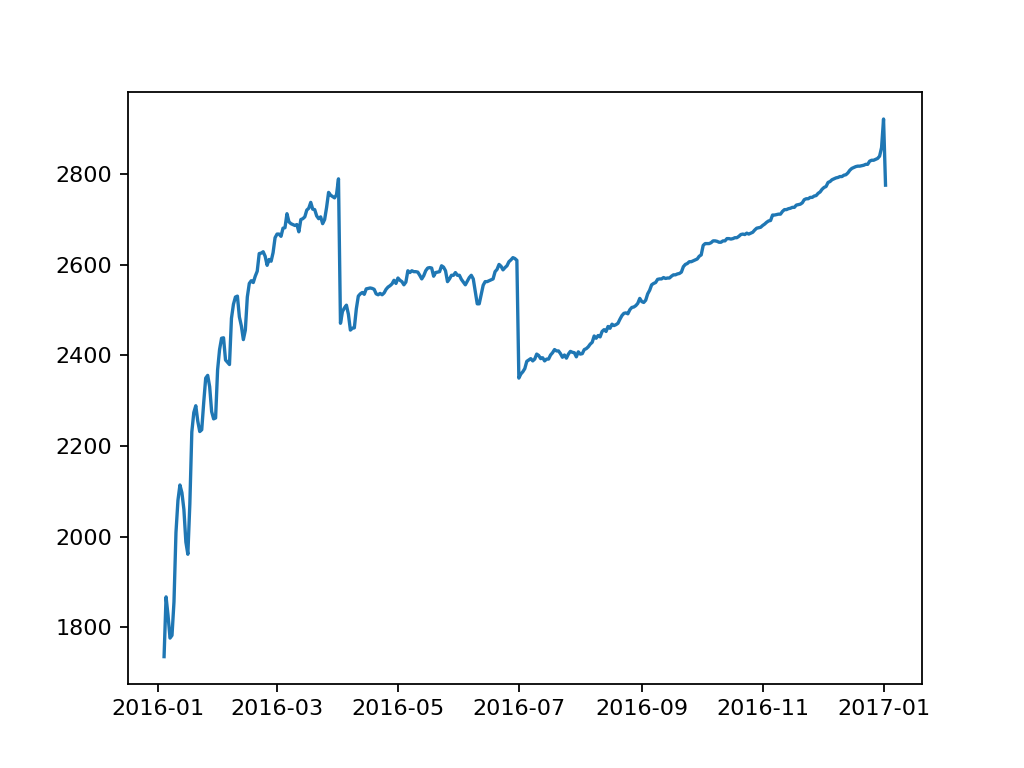

In [47]:
plt.figure()
plt.plot(df_listing) 

### Correlation between ratings and other features

In [59]:
mat_corr  = list_df.corr()

<IPython.core.display.Javascript object>


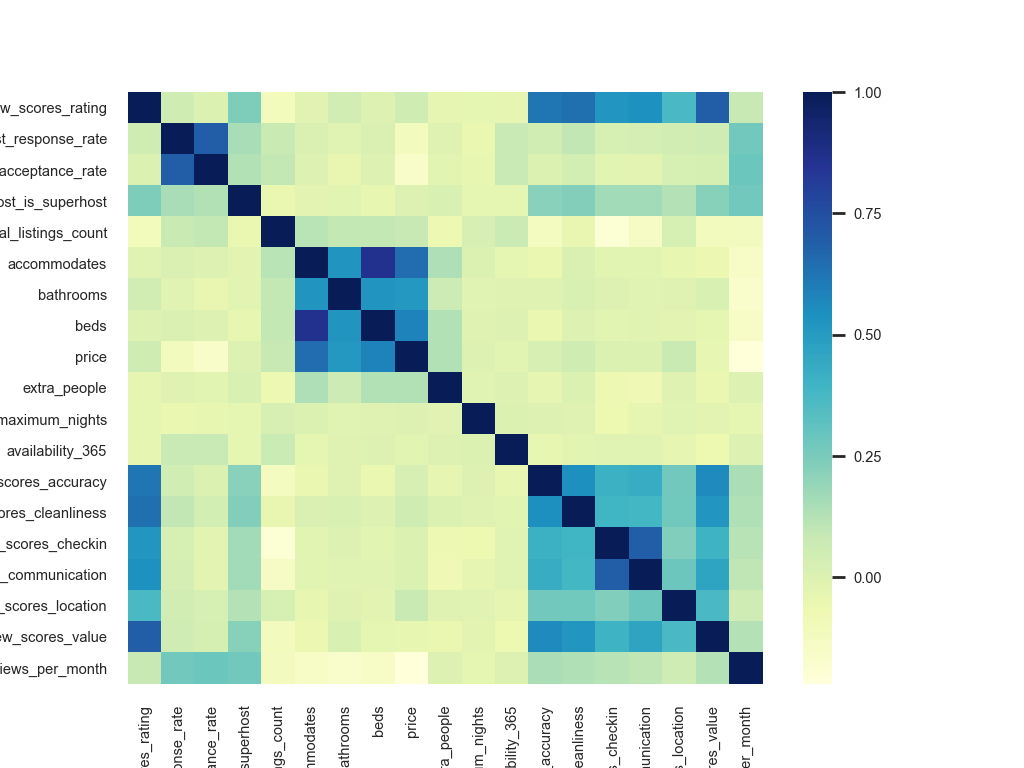

In [81]:
sns.set(font_scale=0.6)
ax = sns.heatmap(mat_corr, cmap="YlGnBu")